In [1]:
#! pip install translate
import pandas as pd, numpy as np, xlsxwriter, matplotlib.pyplot as plt, seaborn as sns, os, math
from datetime import datetime as dt
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from notifypy import Notify
notification = Notify()
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\n*****Required libraries imported*****")


*****Required libraries imported*****


# Mention project raw data filename below

In [2]:
# Asking for project ID from the user
file_Name = input('Please enter file name = ')

# Asking for project ID from the user
PID = input('Please provide PID of project = ')

Please enter file name =  cases_report_Hindustan Unilever Limited_All_(All States)_2024-11-27.csv
Please provide PID of project =  PID/HINDU13/2023/MSME-DI/0376


In [3]:
def csvORexcel():
    global path
    path = "C:\\Python\\read\\"+file_Name
    try:
        if file_Name.split('.')[-1].startswith('c'):
            df = pd.read_csv(path)
            return df
        elif file_Name.split('.')[-1].startswith('x'):
            df = pd.read_excel(path)
            return df
    except FileNotFoundError:
        print("The file name {0} has not found".format(path))

fn = file_Name

In [5]:
exe_start = dt.now() # Recording execution start time
data0 = csvORexcel() # Reading exce/csv file
init_file_size = round(os.path.getsize(path)/1000000,2) # Getting excel file size
#data0 = pd.read_excel(r'C:\Users\akash\Documents\Haqdarshak\Work\Nassscom\1.0\cases_report__1_Nasscom1_uniques_till_27_Feb.xlsx', "Unique DI Data")
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,Case Organization,Case District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID
0,EP03QSPF,30-Jan-2024,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Data complete,NaN,NaN,Not Suspected,GJ - Hindustan Unilever Limited,MAHESANA,PN03UDYN,Sunita Gautambhai Parmar,F,9.173603e+09,41.0,NaN,NaN,PG03LN3E,Parmar,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0
1,EP03RB5J,01-Feb-2024,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Data complete,NaN,NaN,Not Suspected,GJ - Hindustan Unilever Limited,MAHESANA,PN03UYKJ,Sonalben Chauhan,F,9.723374e+09,37.0,MAHESANA,Bamosana,PG03M7GY,Chauhan,dimpal.chakravarti,Chakravarti Dimpalben,Darshankumar Bipinchandra Chakravarti,16776.0
2,EP03TN7I,20-Feb-2024,Udyam Registration for MSME (Central),DC0008R0,Data complete,NaN,NaN,Not Suspected,GJ - Hindustan Unilever Limited,AHMADABAD,PN03XDVC,Sabina Ibrahim Padhiyar,F,9.313478e+09,34.0,NaN,NaN,PG03OMED,Padhiyar,Firoza.Biyawarwala,Firoza Aasif Biyawarwala,Hina Kachchhi,7902.0
3,EP03VGTY,27-Feb-2024,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Data complete,NaN,NaN,Not Suspected,RJ - Hindustan Unilever Limited,RAJSAMAND,PN03Z4B3,Gopal lal Sen,M,9.680012e+09,25.0,BHIM,Ajeetgarh,PG03QCQU,Sen,pushpa.devi2,pushpa devi,Mukesh Kumar Dhaker,17191.0
4,EP03VHQO,27-Feb-2024,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Data complete,NaN,NaN,Not Suspected,GJ - Hindustan Unilever Limited,MAHESANA,PN03Z57W,Geetabrn Prajapati,F,9.712601e+09,41.0,MAHESANA,Gorad,PG03QDN9,Prajapati,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21435 entries, 0 to 21434
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Case Id                21435 non-null  object 
 1   Createdon              21434 non-null  object 
 2   Scheme/Doc             21434 non-null  object 
 3   Scheme/Doc GUID        21434 non-null  object 
 4   Status                 21434 non-null  object 
 5   Docket Submitted Date  18918 non-null  object 
 6   Benefit received Date  7418 non-null   object 
 7   HD Suspected Cases     21434 non-null  object 
 8   Case Organization      21434 non-null  object 
 9   Case District          21434 non-null  object 
 10  Citizen GUID           21434 non-null  object 
 11  Citizen Name           21434 non-null  object 
 12  Gender                 21434 non-null  object 
 13  Mobile                 21434 non-null  float64
 14  Age                    21434 non-null  float64
 15  Ci

In [7]:
states = {'AP':'Andhra Pradesh',
'AR':'Arunachal Pradesh',
'AS':'Assam',
'BR':'Bihar',
'BH':'Bihar',
'CT':'Chhattisgarh',
'CG':'Chhattisgarh',
'DL':'Delhi', 
'GA':'Goa',
'GJ':'Gujarat',
'HR':'Haryana',
'HP':'Himachal Pradesh',
'JH':'Jharkhand',
'KA':'Karnataka',
'KL':'Kerala',
'MP':'Madhya Pradesh',
'MH':'Maharashtra',
'MN':'Manipur',
'ML':'Meghalaya',
'MZ':'Mizoram',
'NL':'Nagaland',
'OR':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN':'Tamil Nadu',
'TG':'Telangana',
'TR':'Tripura',
'UP':'Uttar Pradesh',
'UT':'Uttarakhand',
'WB':'West Bengal'}

# Data Cleaning

In [8]:
# Defining a function to remove extra spaces between words.
def rem_space(x):
    try:
        n = x.strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    except AttributeError:
        n = str(x).strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    
    name = '' # Decalring a empty name
    
    for w in n:
        if w != '': # This will execute if non empty word found
            if name == '': # This will run if "name" variable is empty
                name = w # Storing name into "name" variable.
            else: # This will run if "name" variable is not empty
                name = name + ' ' + w # Joining the names with single spaces.
    
    return name

In [9]:
# Remove last row.
data0.drop(index = data0[data0.Createdon.isna()].index, inplace=True)

# Replace null values
data0['Scheme/Doc'].fillna('a', inplace=True)
data0['Citizen Name'].fillna('a', inplace=True)
data0['HD Name'].fillna('blank', inplace=True)
data0.Mobile.fillna(0, inplace=True)

# Changing status values and keeping only "Open/Submit/BR"
data0['Status'] = data0['Status'].apply(lambda x: 'Open' if x == 'Data complete' else 'Submitted' if (x=='Docket submitted' or x=='Document ready') else "Benefit Received" if x=='Scheme/Document received' else x)

# Changing Case Organization values from state initials to full state name.
data0['Case Organization'] = data0['Case Organization'].apply(lambda x: states[x[:2]])

# Renaming column "Case Organiisation" & "Case District" to "State" & "Disctrict"
data0.rename(columns={"Case Organization":"State","Case District":"District"}, inplace=True)

# Removing extra spaces in Opsco name 
data0['Opsco name'] = data0['Opsco name'].apply(lambda x: rem_space(x))

# Convert Mobile column from float to string for concatenation.
data0['Mobile'] = data0['Mobile'].apply(lambda x: str(x).strip())

# Change gender from initial letter to full form.
data0['Gender'] = data0['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female' if x=='F' else 'Other' if x=='O' else x)

# Convert "Createdon", "Docket Submitted Date", "Benefit received Date" column data type to Datetime format
dt_col = ['Createdon', 'Docket Submitted Date', 'Benefit received Date', 'DOB']

for col in dt_col:
    try:
        data0[col] = pd.to_datetime(data0[col], format='mixed', errors='ignore')
        #data0[col] = data0[col].apply(lambda x: x.strftime('%d-%m-%Y') if type(x) != pd._libs.tslibs.nattype.NaTType else x)
    except KeyError:
        continue


# Deleting records with status "Case Aborted" and "Application rejected"
rejectedDF = data0[(data0.Status == 'Case Aborted') | (data0.Status == 'Application rejected')] # Storing prev step deleted data
data0 = data0[(data0['Status'] != 'Case Aborted') & (data0['Status'] != 'Application rejected')]

data0.reset_index(inplace=True, drop=True)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                19415 non-null  object        
 1   Createdon              19415 non-null  datetime64[ns]
 2   Scheme/Doc             19415 non-null  object        
 3   Scheme/Doc GUID        19415 non-null  object        
 4   Status                 19415 non-null  object        
 5   Docket Submitted Date  17857 non-null  datetime64[ns]
 6   Benefit received Date  7268 non-null   datetime64[ns]
 7   HD Suspected Cases     19415 non-null  object        
 8   State                  19415 non-null  object        
 9   District               19415 non-null  object        
 10  Citizen GUID           19415 non-null  object        
 11  Citizen Name           19415 non-null  object        
 12  Gender                 19415 non-null  object        
 13  M

# Translate local language district name to English

### Custom translator

In [10]:
def Trans(x):
    t = Translator()
    attempt = 0
    max_attempts = 5
    alph = [chr(i) for i in range(65,122)]

    while attempt < max_attempts:
        if x[0] not in alph:
            try:
                xlated = t.translate(x)
                return xlated.text
            except AttributeError as e:
                if 'raise_Exception' in str(e):
                    print(f"Encountered rate limit error, attempt {attempt+1}/{max_attempts}. Retrying in 8 seconds...")
                    time.sleep(8)
                    attempt += 1
                else:
                    raise
            except Exception as e:
                print(e)
                break
            return "Failed to translate after multiple attempts."
        else:
            return x.title()

dist = {}

for d in data0['District'].value_counts().index:
    if d in dist.keys():
        break
    else:
        dist[d] = Trans(d)

dist

{'HARIDWAR': 'Haridwar',
 'SOUTH': 'South',
 'UDAM SINGH NAGAR': 'Udam Singh Nagar',
 'NORTH WEST': 'North West',
 'JAIPUR': 'Jaipur',
 'KANPUR NAGAR': 'Kanpur Nagar',
 'NUH': 'Nuh',
 'DEHRADUN': 'Dehradun',
 'SAHARANPUR': 'Saharanpur',
 'VARANASI': 'Varanasi',
 'JHANSI': 'Jhansi',
 'NAINITAL': 'Nainital',
 'LUCKNOW': 'Lucknow',
 'NASHIK': 'Nashik',
 'SOUTH WEST': 'South West',
 'South East': 'South East',
 'SURAT': 'Surat',
 'BARABANKI': 'Barabanki',
 'CHURU': 'Churu',
 'AHMADABAD': 'Ahmadabad',
 'MAHESANA': 'Mahesana',
 'EAST': 'East',
 'CENTRAL': 'Central',
 'NORTH EAST': 'North East',
 'BANAS KANTHA': 'Banas Kantha',
 'VADODARA': 'Vadodara',
 'RAJSAMAND': 'Rajsamand',
 'JALGAON': 'Jalgaon',
 'AHMEDNAGAR': 'Ahmednagar',
 'PUNE': 'Pune',
 'PALGHAR': 'Palghar',
 'FARIDABAD': 'Faridabad',
 'BHAVNAGAR': 'Bhavnagar',
 'UDAIPUR': 'Udaipur',
 'GAUTAM BUDDHA NAGAR': 'Gautam Buddha Nagar',
 'NORTH': 'North',
 'SIDDHARTH NAGAR': 'Siddharth Nagar',
 'NEW DELHI': 'New Delhi',
 'SATARA': 'Satara

In [11]:
# Renaming Case District name from local language to english

data0['District'] = data0['District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                             else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                             else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                             else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                             else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                             else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

data0['District'].value_counts()

District
Haridwar                                     3044
South                                        2555
Udham Singh Nagar                            1687
North West                                   1517
Jaipur                                       1150
Kanpur Nagar                                 1056
Nuh                                          1030
Dehradun                                      968
Saharanpur                                    875
Varanasi                                      830
Jhansi                                        449
Nainital                                      399
Lucknow                                       375
Nashik                                        348
South West                                    319
South East                                    296
Surat                                         278
Barabanki                                     194
Churu                                         180
Ahmadabad                                

# Mention orgwise scheme applied raw data filename below

In [12]:
file_Name = 'orgwise_schemes_applied.xlsx'

In [13]:
# Importing Schemes data from Orgwise schemes applied report
schemeDetails = csvORexcel()
schemeDetails = schemeDetails[~schemeDetails['Parent Scheme GUID'].isna()]
schemeDetails = schemeDetails[schemeDetails['Project Id'] == PID]
schemeDetails.head()

,State,Org Name,Project Id,Scheme Id,status,Parent Scheme GUID,Parent Scheme,Scheme Name,Scheme type,Fee,Timeline,Benefit Value,Open,Submitted,Received
717,Haryana,HR - Hindustan Unilever Limited,PID/HINDU13/2023/MSME-DI/0376,DC0008R0,5,PDC0009KI,Udyam registration,Udyam Registration for MSME (Central),doc,250,NaN,21865,159,146.0,146.0
718,Haryana,HR - Hindustan Unilever Limited,PID/HINDU13/2023/MSME-DI/0376,SH0008BK,5,PSH000CT6,Pradhan Mantri Mudra Yojana - PMMY,Pradhan Mantri Mudra Yojana_Ministry of Financ...,sch,0,Between 2,64075,550,549.0,5.0
719,Haryana,HR - Hindustan Unilever Limited,PID/HINDU13/2023/MSME-DI/0376,SH0009RR,5,PSH0009SG,Yojana Card,Loyalty Yojana Card,sch,85,NaN,0,366,366.0,366.0
720,Haryana,HR - Hindustan Unilever Limited,PID/HINDU13/2023/MSME-DI/0376,DC0009SJ,5,PSH000A22,Integrated Physical PAN Card,Integrated Physical PAN Card (Central),doc,0,NaN,200,4,3.0,3.0
1142,Uttar Pradesh,UP - Hindustan Unilever Limited,PID/HINDU13/2023/MSME-DI/0376,SH0008BK,5,PSH000CT6,Pradhan Mantri Mudra Yojana - PMMY,Pradhan Mantri Mudra Yojana_Ministry of Financ...,sch,0,Between 2,64075,1304,1302.0,11.0


In [14]:
# Removing colomuns except 'Scheme Id','Scheme type','Benefit Value' to merge with main dataframe
for s in schemeDetails.columns:
    if s not in ['Scheme Id','Scheme type','Benefit Value','Parent Scheme']:
        schemeDetails.drop(columns=s, inplace=True)

# Merging scheme details with main dataframe to get data of Scheme type & Benefit Value.
data0 = data0.merge(schemeDetails.drop_duplicates(subset=['Scheme Id'], keep='last'), left_on='Scheme/Doc GUID', right_on="Scheme Id", how='left')

# Removing non required column "Scheme ID"
data0.drop(columns = 'Scheme Id', inplace=True)

# Changing short form to "Scheme" & "Document"
data0['Scheme type'] = data0['Scheme type'].apply(lambda x: 'Scheme' if x=='sch' else 'Document' if x=='doc' else x)

# Converting "Benefit Value" columns to integer type
data0['Benefit Value'].fillna('0', inplace=True)
data0['Benefit Value'] = data0['Benefit Value'].apply(lambda x: int(x) if x.isnumeric() else 0)
data0['Benefit Value'] = data0['Benefit Value'].astype('int64')

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value
0,EP03QSPF,2024-01-30,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UDYN,Sunita Gautambhai Parmar,Female,9173602866.0,41.0,NaN,NaN,PG03LN3E,Parmar,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075
1,EP03RB5J,2024-02-01,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UYKJ,Sonalben Chauhan,Female,9723373762.0,37.0,MAHESANA,Bamosana,PG03M7GY,Chauhan,dimpal.chakravarti,Chakravarti Dimpalben,Darshankumar Bipinchandra Chakravarti,16776.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075
2,EP03TN7I,2024-02-20,Udyam Registration for MSME (Central),DC0008R0,Open,NaT,NaT,Not Suspected,Gujarat,Ahmadabad,PN03XDVC,Sabina Ibrahim Padhiyar,Female,9313478073.0,34.0,NaN,NaN,PG03OMED,Padhiyar,Firoza.Biyawarwala,Firoza Aasif Biyawarwala,Hina Kachchhi,7902.0,Udyam registration,Document,21865
3,EP03VGTY,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Rajasthan,Rajsamand,PN03Z4B3,Gopal lal Sen,Male,9680012153.0,25.0,BHIM,Ajeetgarh,PG03QCQU,Sen,pushpa.devi2,pushpa devi,Mukesh Kumar Dhaker,17191.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075
4,EP03VHQO,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03Z57W,Geetabrn Prajapati,Female,9712600717.0,41.0,MAHESANA,Gorad,PG03QDN9,Prajapati,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075


In [15]:
# Checking if number of data point has increased or not
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                19415 non-null  object        
 1   Createdon              19415 non-null  datetime64[ns]
 2   Scheme/Doc             19415 non-null  object        
 3   Scheme/Doc GUID        19415 non-null  object        
 4   Status                 19415 non-null  object        
 5   Docket Submitted Date  17857 non-null  datetime64[ns]
 6   Benefit received Date  7268 non-null   datetime64[ns]
 7   HD Suspected Cases     19415 non-null  object        
 8   State                  19415 non-null  object        
 9   District               19415 non-null  object        
 10  Citizen GUID           19415 non-null  object        
 11  Citizen Name           19415 non-null  object        
 12  Gender                 19415 non-null  object        
 13  M

# Mention rate card raw data file name below

In [16]:
file_Name = 'rate_card.xlsx'

In [17]:
rate_card = csvORexcel()
rate_card = rate_card[rate_card['Org_PID'] == PID].sort_values('created_on')
rate_card.head()

,Org_PID,Org_Name,org_id,schemes_Guid,sch_name,sch id,ratecard_guid,open_price,Docket submitted price,scheme_document_received price,created_on
61929,PID/HINDU13/2023/MSME-DI/0376,GJ - Hindustan Unilever Limited,1266,SH000DG0,Private Business Loan Scheme_(Central),17424,RC00R50Z,0.0,0.0,0.0,2023-12-08 12:17:28
61935,PID/HINDU13/2023/MSME-DI/0376,GJ - Hindustan Unilever Limited,1266,DC0008R0,Udyam Registration for MSME (Central),11340,RC00R50Z,0.0,0.0,0.0,2023-12-08 12:17:28
61926,PID/HINDU13/2023/MSME-DI/0376,GJ - Hindustan Unilever Limited,1266,SH0009RA,Prime Minister Employment Generation Program (...,12646,RC00R50Z,0.0,0.0,0.0,2023-12-08 12:17:28
61923,PID/HINDU13/2023/MSME-DI/0376,GJ - Hindustan Unilever Limited,1266,SH0008BK,Pradhan Mantri Mudra Yojana_Ministry of Financ...,10784,RC00R50Z,0.0,0.0,0.0,2023-12-08 12:17:28
61940,PID/HINDU13/2023/MSME-DI/0376,GJ - Hindustan Unilever Limited,1266,SH000DPW,Vidya Lakshmi Education Loan Scheme_(Central),17780,RC00R50Z,0.0,0.0,0.0,2023-12-08 12:17:28


In [18]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment(data0, rate_card):
    price = {'index':[], 'Scheme/Doc GUID':[], 'open_price':[], 'Docket submitted price':[], 'scheme_document_received price':[]} # Declaring a blank dictionary for storing price.
    
    for SID, di in zip(data0['Scheme/Doc GUID'], data0['Scheme/Doc GUID'].index): # Getting Scheme GUID and index number from schemes data.
        price['Scheme/Doc GUID'].append(SID) # Storing Scheme GUID from schemes data.
        price['index'].append(di) # Storing index number from schemes data.
        rate_sch = rate_card[rate_card.schemes_Guid == SID].sort_values('created_on') # Storing scheme GUID based filtered data from rate_card.
        rate_sch['created_on'] = rate_sch.created_on.apply(lambda x: x.strftime("%d-%m-%Y"))
        for d in rate_sch.created_on: # To check if multiple rates present under single scheme GUID based on rate card createdon date.
            date_sch = rate_sch[rate_sch.created_on == d].sort_values('created_on') # Get all records for same date.
            if date_sch.shape[0] > 1:
                rate_sch.drop(index = date_sch.index.min(), inplace=True) # Keep only latest record based on index number.
        rate_sch.created_on = pd.to_datetime(rate_sch.created_on, format='mixed', errors='ignore')
        if rate_sch.shape[0] > 1: # Checking if filtered data has more than 1 results.
            for i in rate_sch.index: # Iterating through filtered results.
                if data0.Createdon.loc[di] >= rate_sch.created_on.iloc[-1]: # Checking if cases created date is later than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.iloc[-1]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].iloc[-1]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].iloc[-1]) # Storing BR price from rate card to "price" dictionary.
                    #print('for if = {0} >= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.iloc[-1]))
                    break
                elif data0.Createdon.loc[di] <= rate_sch.created_on.loc[i]: # Checking if cases created date is earlier than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.loc[i]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[i]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[i]) # Storing BR price from rate card to "price" dictionary.
                    #print('for elif = {0} <= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.loc[i]))
                    break
        else: # This will execute if filtered data has only single result.
            #print(SID)
            try:
                price['open_price'].append(rate_sch.open_price.loc[rate_sch.index[0]]) # Storing open price from rate card to "price" dictionary.
                price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[rate_sch.index[0]]) # Storing DS price from rate card to "price" dictionary.
                price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[rate_sch.index[0]]) # Storing BR price from rate card to "price" dictionary.
                #print('if-else')
            except: # This will execute if Scheme not available in rate card under selected PID
                #print(SID)
                price['open_price'].append(0)
                price['Docket submitted price'].append(0)
                price['scheme_document_received price'].append(0)
    
    price = pd.DataFrame(price) # Converting price dictionary to pandas dataframe.
    data0 = data0.merge(price.drop(columns=['Scheme/Doc GUID']), left_on=data0.index, right_on='index', how='left') # Merging "price" datafram with "cases report".
    data0.drop(columns=['index'], inplace=True) # Removing index column
    data0['HD_Payment'] = data0.open_price + data0['Docket submitted price'] + data0['scheme_document_received price'] # Adding column for HD payment.
    return data0

In [19]:
data0 = hdPayment(data0, rate_card)
rejectedDF = hdPayment(rejectedDF, rate_card)

In [20]:
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment
0,EP03QSPF,2024-01-30,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UDYN,Sunita Gautambhai Parmar,Female,9173602866.0,41.0,NaN,NaN,PG03LN3E,Parmar,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0
1,EP03RB5J,2024-02-01,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UYKJ,Sonalben Chauhan,Female,9723373762.0,37.0,MAHESANA,Bamosana,PG03M7GY,Chauhan,dimpal.chakravarti,Chakravarti Dimpalben,Darshankumar Bipinchandra Chakravarti,16776.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0
2,EP03TN7I,2024-02-20,Udyam Registration for MSME (Central),DC0008R0,Open,NaT,NaT,Not Suspected,Gujarat,Ahmadabad,PN03XDVC,Sabina Ibrahim Padhiyar,Female,9313478073.0,34.0,NaN,NaN,PG03OMED,Padhiyar,Firoza.Biyawarwala,Firoza Aasif Biyawarwala,Hina Kachchhi,7902.0,Udyam registration,Document,21865,0.0,120.0,180.0,300.0
3,EP03VGTY,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Rajasthan,Rajsamand,PN03Z4B3,Gopal lal Sen,Male,9680012153.0,25.0,BHIM,Ajeetgarh,PG03QCQU,Sen,pushpa.devi2,pushpa devi,Mukesh Kumar Dhaker,17191.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0
4,EP03VHQO,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03Z57W,Geetabrn Prajapati,Female,9712600717.0,41.0,MAHESANA,Gorad,PG03QDN9,Prajapati,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0


In [21]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         19415 non-null  object        
 1   Createdon                       19415 non-null  datetime64[ns]
 2   Scheme/Doc                      19415 non-null  object        
 3   Scheme/Doc GUID                 19415 non-null  object        
 4   Status                          19415 non-null  object        
 5   Docket Submitted Date           17857 non-null  datetime64[ns]
 6   Benefit received Date           7268 non-null   datetime64[ns]
 7   HD Suspected Cases              19415 non-null  object        
 8   State                           19415 non-null  object        
 9   District                        19415 non-null  object        
 10  Citizen GUID                    19415 non-null  object        
 11  Ci

# DFL Schemes

- SH0009SW = Digital productivity Service_ Basic
- SH000BM6 = Digital productivity Service_Basic
- SH000AG6 = Digital Productivity Services_Advanced
- SH000A32 = Long Training on Digital & Financial Inclusion_Private
- SH0009SW = Short Training on Digital & Financial Inclusion_Private
- SH000AG6 = Digital Productivity Services and and employability training_Advanced

# Removing DFL data

In [22]:
# Adding column "Scheme Type" to differentiate Schemes and DFL
data0["Scheme Category"] = data0['Scheme/Doc GUID'].apply(lambda x: "DFL" if (x=="SH0009SW" or x=="SH000AG6" or x=="SH000A32" or x=="SH0009SW" or x=="SH000AG6" or x=="SH000BM6") else "E-Gov")
og_DF=data0.copy()
dfl = data0[(data0['Scheme/Doc GUID'] == 'SH0009SW') | (data0['Scheme/Doc GUID'] == 'SH000AG6') | (data0['Scheme/Doc GUID'] == 'SH000A32') | (data0['Scheme/Doc GUID']=='SH0009SW') | (data0['Scheme/Doc GUID']=='SH000AG6') | (data0['Scheme/Doc GUID']=='SH000BM6')]
data0 = data0[(data0['Scheme/Doc GUID'] != 'SH0009SW') & (data0['Scheme/Doc GUID'] != 'SH000AG6') & (data0['Scheme/Doc GUID'] != 'SH000A32') & (data0['Scheme/Doc GUID']!='SH0009SW') & (data0['Scheme/Doc GUID']!='SH000AG6') & (data0['Scheme/Doc GUID']!='SH000BM6')]
print("DFL Count={0}\nE-Gov Count={1}".format(len(dfl),len(data0)))

DFL Count=0
E-Gov Count=19415


In [23]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         19415 non-null  object        
 1   Createdon                       19415 non-null  datetime64[ns]
 2   Scheme/Doc                      19415 non-null  object        
 3   Scheme/Doc GUID                 19415 non-null  object        
 4   Status                          19415 non-null  object        
 5   Docket Submitted Date           17857 non-null  datetime64[ns]
 6   Benefit received Date           7268 non-null   datetime64[ns]
 7   HD Suspected Cases              19415 non-null  object        
 8   State                           19415 non-null  object        
 9   District                        19415 non-null  object        
 10  Citizen GUID                    19415 non-null  object        
 11  Ci

# Duplicate Column

In [24]:
# Filling missing values of "Parent Scheme" from "Scheme/Doc" column
for i in data0[data0['Parent Scheme'].isna()].index:
    data0['Parent Scheme'][i] = data0['Scheme/Doc'][i]
    
# Creating column with name 'duplicate' by concatenation
data0['Mobile'] = data0['Mobile'].astype('str')
data0['duplicate'] = data0['Scheme/Doc'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
dfl['duplicate'] = dfl['Scheme/Doc'] + dfl['Citizen Name'] + dfl['Mobile']
data0['duplicate'] = data0['duplicate'].apply(lambda x: x.lower()) # Converting duplicate column in lower case because python considers ASCII values of each character while checking for duplicates.
dfl['duplicate'] = dfl['duplicate'].apply(lambda x: x.lower())
data0['parent_duplicate'] = data0['Parent Scheme'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
data0['parent_duplicate'] = data0['parent_duplicate'].apply(lambda x: x.lower())
data0.Mobile = data0.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type
#dfl.Mobile = dfl.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate,parent_duplicate
0,EP03QSPF,2024-01-30,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UDYN,Sunita Gautambhai Parmar,Female,9173602866,41.0,NaN,NaN,PG03LN3E,Parmar,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0,E-Gov,pradhan mantri mudra yojana_ministry of financ...,pradhan mantri mudra yojana - pmmysunita gauta...
1,EP03RB5J,2024-02-01,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03UYKJ,Sonalben Chauhan,Female,9723373762,37.0,MAHESANA,Bamosana,PG03M7GY,Chauhan,dimpal.chakravarti,Chakravarti Dimpalben,Darshankumar Bipinchandra Chakravarti,16776.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0,E-Gov,pradhan mantri mudra yojana_ministry of financ...,pradhan mantri mudra yojana - pmmysonalben cha...
2,EP03TN7I,2024-02-20,Udyam Registration for MSME (Central),DC0008R0,Open,NaT,NaT,Not Suspected,Gujarat,Ahmadabad,PN03XDVC,Sabina Ibrahim Padhiyar,Female,9313478073,34.0,NaN,NaN,PG03OMED,Padhiyar,Firoza.Biyawarwala,Firoza Aasif Biyawarwala,Hina Kachchhi,7902.0,Udyam registration,Document,21865,0.0,120.0,180.0,300.0,E-Gov,udyam registration for msme (central)sabina ib...,udyam registrationsabina ibrahim padhiyar93134...
3,EP03VGTY,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Rajasthan,Rajsamand,PN03Z4B3,Gopal lal Sen,Male,9680012153,25.0,BHIM,Ajeetgarh,PG03QCQU,Sen,pushpa.devi2,pushpa devi,Mukesh Kumar Dhaker,17191.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0,E-Gov,pradhan mantri mudra yojana_ministry of financ...,pradhan mantri mudra yojana - pmmygopal lal se...
4,EP03VHQO,2024-02-27,Pradhan Mantri Mudra Yojana_Ministry of Financ...,SH0008BK,Open,NaT,NaT,Not Suspected,Gujarat,Mahesana,PN03Z57W,Geetabrn Prajapati,Female,9712600717,41.0,MAHESANA,Gorad,PG03QDN9,Prajapati,gautam.parmar,GAUTAM PARMAR,Darshankumar Bipinchandra Chakravarti,16808.0,Pradhan Mantri Mudra Yojana - PMMY,Scheme,64075,0.0,180.0,120.0,300.0,E-Gov,pradhan mantri mudra yojana_ministry of financ...,pradhan mantri mudra yojana - pmmygeetabrn pra...


In [25]:
dfl.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate


# Duplicate Data

In [26]:
# Checking number of all duplicate records
duplicateData = data0[data0.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
parentDuplicateData = data0[data0.duplicated(['parent_duplicate'],keep=False)].sort_values('parent_duplicate')
dflDuplicates = dfl[dfl.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
duplicateData = pd.concat([duplicateData,dflDuplicates], ignore_index=True)
duplicateData.reset_index(inplace=True, drop = True)

try:
    duplicateData.drop(index=duplicateData.index[-1], inplace=True)
except IndexError:
    print(duplicateData.shape)

duplicateData.shape

(89, 33)

# Unique Data

In [27]:
# Keeping uniques excluding duplicates
unique_data = data0.drop(index = data0[data0.duplicated(['duplicate'], keep='last')].index)
dfl_uniques = dfl.drop(index = dfl[dfl.duplicated(['duplicate'], keep = 'last')].index)
#unique_data = data0.drop(index = data0[data0.duplicated(['parent_duplicate'], keep='last')].index)
unique_data.reset_index(inplace=True, drop = True)
dfl_uniques.reset_index(inplace=True, drop = True)

try:
    unique_data.drop(index=unique_data.index[-1], inplace=True)
except IndexError:
    print(unique_data.shape)

try:
    dfl_uniques.drop(index=dfl_uniques.index[-1], inplace=True)
except IndexError:
    print(dfl_uniques.shape)

unique_data.shape

(0, 32)


(19369, 33)

# For NASSCOM FOUNDATION 1.0 Only

#### Remove non listed district data

In [28]:
if 'Nasscom1.0_All' in fn:
    NoListDict = pd.DataFrame(unique_data['District'].value_counts(normalize=True).reset_index())
    for dist in list(NoListDict[NoListDict['proportion']<0.001].District):
        unique_data = unique_data[unique_data.District!=dist]
    unique_data.District.value_counts()

In [29]:
# Creating table citizen to scheme ratio.
cit_sch_ratio = pd.DataFrame(unique_data['Citizen GUID'].value_counts())
cit_sch_ratio.rename(columns={'count':'No of cases'}, inplace=True)
cit_sch_ratio.reset_index(inplace=True)
cit_sch_ratio.head()

,Citizen GUID,No of cases
0,PN04AT2D,4
1,PN049KBZ,4
2,PN0475LQ,4
3,PN044V0X,4
4,PN03WEG0,4


In [30]:
# Merging no of cases with main project data.
unique_data = unique_data.merge(cit_sch_ratio.drop_duplicates(subset=['Citizen GUID']), on = 'Citizen GUID', how = 'left')
unique_data['No of cases'].fillna(0.0, inplace=True)
unique_data['No of cases'] = unique_data['No of cases'].astype('int64')
unique_data.reset_index(inplace=True, drop = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19369 entries, 0 to 19368
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         19369 non-null  object        
 1   Createdon                       19369 non-null  datetime64[ns]
 2   Scheme/Doc                      19369 non-null  object        
 3   Scheme/Doc GUID                 19369 non-null  object        
 4   Status                          19369 non-null  object        
 5   Docket Submitted Date           17811 non-null  datetime64[ns]
 6   Benefit received Date           7257 non-null   datetime64[ns]
 7   HD Suspected Cases              19369 non-null  object        
 8   State                           19369 non-null  object        
 9   District                        19369 non-null  object        
 10  Citizen GUID                    19369 non-null  object        
 11  Ci

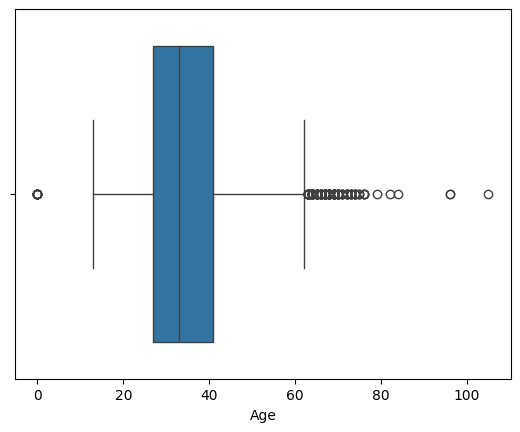

In [31]:
sns.boxplot(data=unique_data,x='Age')
plt.show()

# Project wise O / S / BR

,Status,Total Application
1,Benefit Received,7257
2,Open,1558
0,Submitted,10554
3,Grand Total,19369


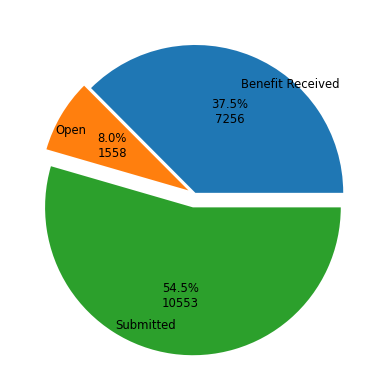

In [32]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Changing status values to O_S_BR
projectwise_O_S_BR = pd.DataFrame(unique_data.Status.value_counts())
projectwise_O_S_BR.rename(columns={'count':'Total Application'}, inplace=True)
projectwise_O_S_BR.reset_index(inplace=True)
projectwise_O_S_BR.loc[len(projectwise_O_S_BR.index)] = ['Grand Total', projectwise_O_S_BR['Total Application'].sum()]
try:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,2,0,3]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:3], labels=projectwise_O_S_BR['Status'][0:3], rotatelabels=False, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:3]), explode=[0.01,0.05,0.09], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
except IndexError:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,0,2]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:2], labels=projectwise_O_S_BR['Status'][0:2], rotatelabels=True, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:2]), explode=[0.01,0.05], textprops={'fontsize' : 'small'}, labeldistance = 0.8)

projectwise_O_S_BR

# Districtwise Count

In [33]:
districtWise = pd.pivot_table(data=unique_data, index='District', columns='Status', values='Case Id', aggfunc='count', fill_value=0).reset_index()

if 'Benefit Received' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Open']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Total']]

elif 'Submitted' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Benefit Received', 'Total']]

elif 'Open' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Submitted', 'Benefit Received', 'Total']]

else:
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Benefit Received', 'Total']]
    
    
districtWise

Status,District,Open,Submitted,Benefit Received,Total
0,Ahmadabad,6,117,42,165
1,Ahmednagar,11,0,76,87
2,Aligarh,0,0,1,1
3,Almora,0,18,0,18
4,Banas Kantha,5,73,26,104
5,Barabanki,1,116,76,193
6,Bhavnagar,0,64,0,64
7,Central,9,53,55,117
8,Churu,0,83,97,180
9,Dehradun,10,827,130,967


# Orgwise Scheme Diversity

,State,Total unique schemes,Total Applications,Shcemes with more than 10% application
2,Delhi,7,5151,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."
1,Gujarat,10,906,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."
6,Haryana,4,1099,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."
3,Maharashtra,7,760,[Chief Minister Employment Generation Programm...
4,Rajasthan,6,1479,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."
5,Uttar Pradesh,5,3858,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."
0,Uttarakhand,12,6116,"[Loyalty Yojana Card, Pradhan Mantri Mudra Yoj..."


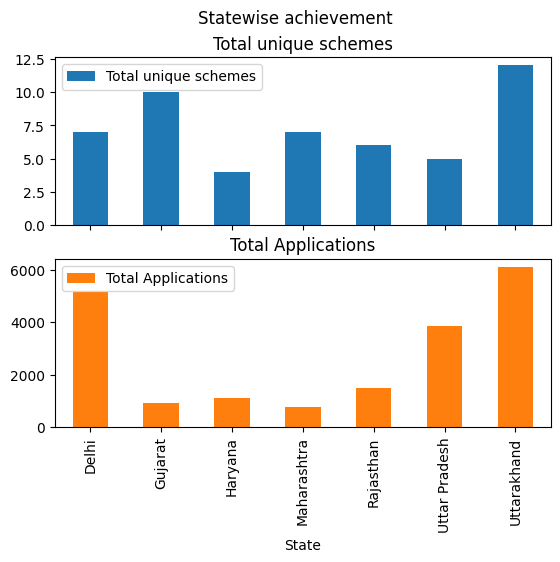

In [34]:
orgSchDiver = unique_data.pivot_table(index=['State','Scheme/Doc'], values='Case Id', aggfunc='count') # Pivoting unique data with "Case Organization" & "Scheme/Doc" rows and count of column "Case Id"
orgSchDiver.reset_index(inplace=True)
Orgwise_Scheme_Diversity = pd.DataFrame(orgSchDiver['State'].value_counts()).reset_index().rename(columns={'count':'Count of unique schemes'}).sort_values('State') # Converting pivot table to pandas data frame
Orgwise_Scheme_Diversity['Total Applications'] = orgSchDiver.groupby(by = 'State')['Case Id'].sum().values # Adding "Total no. of cases" column

'''# 18-35 - DFL Advance/Basic BR
digital_Adult = unique_data[(unique_data['Age'] >= 18) & (unique_data['Age'] <= 35) & (unique_data['Status'] == 'Benefit Received')]
digital_Adult = pd.pivot_table(data=digital_Adult, index = 'Scheme/Doc', values = 'Case Id', aggfunc='count').reset_index()
try:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[1]
except IndexError:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[0]'''

# Shcemes with more than 10% application
orgDict = {} # Declaring a empty dictionary to store Shcemes with more than 10% application
for org in Orgwise_Scheme_Diversity['State']:
    maxApp = pd.DataFrame(orgSchDiver[orgSchDiver['State'] == org].groupby('Scheme/Doc')['Case Id'].sum()
                          >
                          int(orgSchDiver[orgSchDiver['State'] == org]['Case Id'].sum()/10)) # Getting list of more then 10% application
    orgDict[org] = list(maxApp[maxApp['Case Id'] == True].index)
Orgwise_Scheme_Diversity['Shcemes with more than 10% application'] = orgDict.values() # Adding "Shcemes with more than 10% application" column

Orgwise_Scheme_Diversity.rename(columns={"Count of unique schemes":"Total unique schemes"}, inplace=True)
Orgwise_Scheme_Diversity[['State', 'Total unique schemes', 'Total Applications']].set_index('State').plot(kind='bar', title='Statewise achievement', subplots=True)
Orgwise_Scheme_Diversity

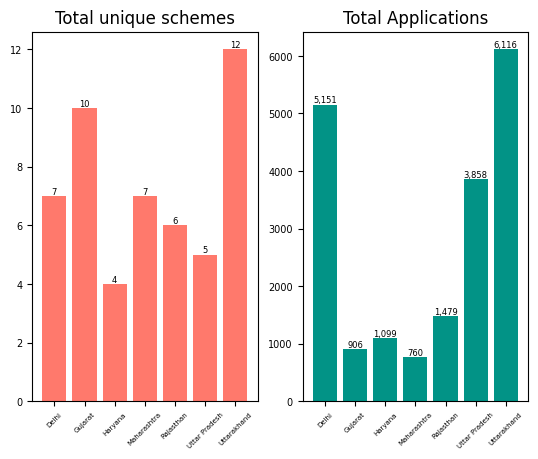

In [35]:
fig, ax = plt.subplots(1,2)
    
bar_container1 = ax[0].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total unique schemes'], color = '#FF796C')
bar_container2 = ax[1].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total Applications'], color = '#029386')

ax[0].tick_params(axis = 'y', labelsize = 7.0)
ax[1].tick_params(axis = 'y', labelsize = 7.0)

ax[0].bar_label(bar_container1, fmt='{:,.0f}', fontsize=6.0)
ax[1].bar_label(bar_container2, fmt='{:,.0f}', fontsize=6.0)

ax[0].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)
ax[1].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)

if len(Orgwise_Scheme_Diversity.State)>1:
    ax[0].set(title = 'Total unique schemes')
    ax[1].set(title = 'Total Applications')
else:
    ax[0].set(title = 'Total unique schemes', ylim = (math.floor(Orgwise_Scheme_Diversity['Total unique schemes'].sum())-1, math.ceil(Orgwise_Scheme_Diversity['Total unique schemes'].sum())+2))
    ax[1].set(title = 'Total Applications', ylim = (math.floor(Orgwise_Scheme_Diversity['Total Applications'].sum()), math.ceil(Orgwise_Scheme_Diversity['Total Applications'].sum())))

# Citizen Scheme Ratio

,Scheme Variety,Total Citizens,Total Cases
0,With 1 scheme,11313,11313
1,With 2 scheme,3001,6002
2,With 3 scheme,674,2022
3,More than 3 schemes,8,32
4,Grand Total,14996,19369


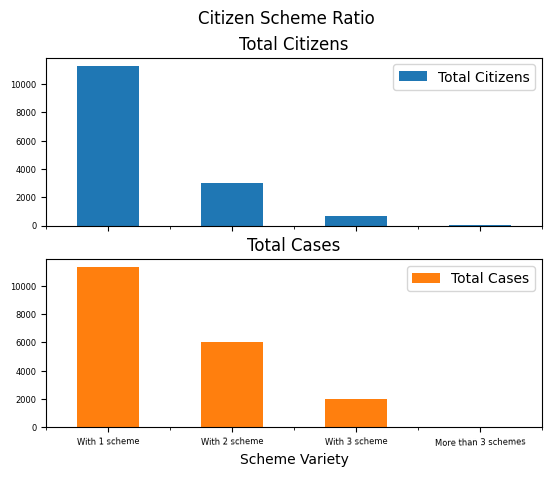

In [36]:
# Scheme variety wise application ratio
cit_sch_ratio = {'Scheme Variety':[],
                 'Total Citizens':[],
                 'Total Cases':[]}

no_of_cases = list(set(unique_data['No of cases'].value_counts().index))
no_of_case = []
no_of_cit = []
for n in no_of_cases:
    if n == 0:
        unique_data.drop(index=(unique_data[unique_data['No of cases'] == n].index), inplace=True)
    
    elif n>0 and n<=3:
        cit_sch_ratio['Scheme Variety'].append('With {0} scheme'.format(n))
        cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
        cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] == n]))
    
    elif n>3:
        if 'More than 3 schemes' in cit_sch_ratio['Scheme Variety']:
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
            
        else:
            cit_sch_ratio['Scheme Variety'].append('More than 3 schemes')
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
    
    else:
        break

# Adding sum of cases and citizens against "More than 3 schemes"
if n>3:
    cit_sch_ratio['Total Cases'].append(sum(no_of_case))
    cit_sch_ratio['Total Citizens'].append(sum(no_of_cit))

# Grand Total
cit_sch_ratio['Scheme Variety'].append('Grand Total')
cit_sch_ratio['Total Citizens'].append(sum(cit_sch_ratio['Total Citizens']))
cit_sch_ratio['Total Cases'].append(sum(cit_sch_ratio['Total Cases']))

# More than 7 schemes
if len(unique_data[unique_data['No of cases'] >= 7]) > 0:
    cit_sch_ratio['Scheme Variety'].append('More than 7 schemes')
    cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] >= 7]))
    cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] >= 7]['Citizen GUID'].value_counts()))

cit_sch_ratio = pd.DataFrame(cit_sch_ratio)
cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')].set_index('Scheme Variety').plot.bar(title='Citizen Scheme Ratio', label = 1, subplots=True, logy=False, log=False, rot=True, fontsize=6, mouseover=True)
cit_sch_ratio

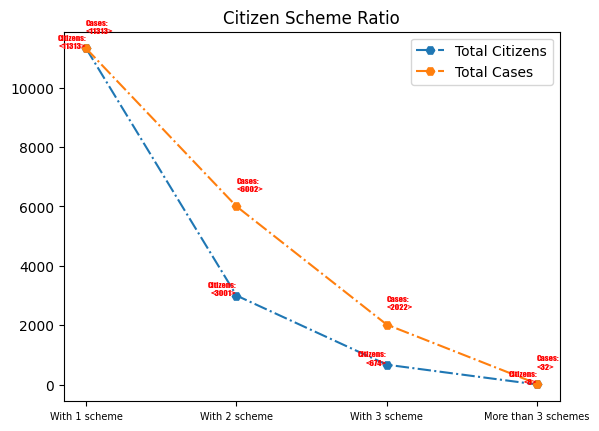

In [37]:
x = cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')]

fig, ax = plt.subplots(1)

ax.plot(x['Scheme Variety'], x[['Total Citizens','Total Cases']], marker = 'H', linestyle = '-.', animated=True)
ax.set_xticklabels(labels=x['Scheme Variety'], fontdict={'fontsize':7.0})
ax.legend(['Total Citizens','Total Cases'])
ax.set(title = 'Citizen Scheme Ratio')
for i, (xi, yi, zi) in enumerate(zip(x['Scheme Variety'], x['Total Citizens'], x['Total Cases'])):
    ax.annotate(f'Citizens:\n<{yi}>', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='right', va='top', fontsize = 6.0, fontname='fantasy', color = 'red')
    ax.annotate(f'Cases:\n<{zi}>', (xi, zi), textcoords="offset points", xytext=(0, 10), ha='left', va='bottom', fontsize = 6.0, fontname='fantasy', color = 'red')

#ax.plot(x['Scheme Variety'], x['Total Cases'], marker = '*', linestyle = '-')
#for i, (xi, yi) in enumerate(zip(x['Scheme Variety'], x['Total Cases'])):
#    ax.annotate(f'{yi}', (xi, yi), textcoords="offset pints", xytext=(0, 10), ha='center', annotation_clip = True)

fig.show()

# Scheme Doc Ratio

,Scheme type,Unique Schemes,Total Applications,Total BV
0,Document,7,2667,65852350
1,Scheme,8,16668,334143350


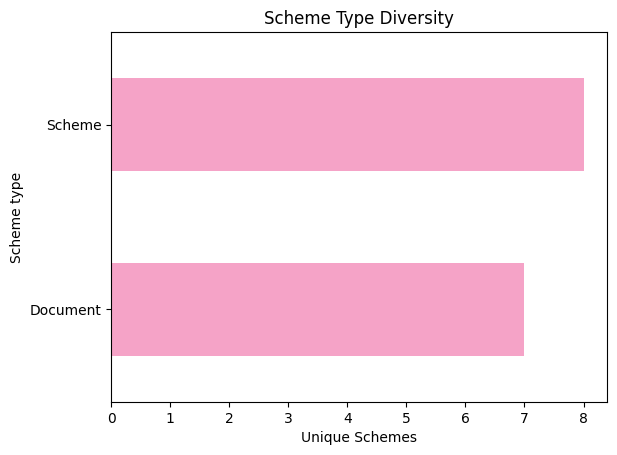

In [38]:
# Scheme type Total application
sch_doc_application = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_application.rename(columns={'Scheme/Doc' : 'Total Applications'}, inplace=True)

# Scheme type Total Benefit value
sch_doc_application['Total BV'] = list(unique_data.groupby(by ='Scheme type')['Benefit Value'].sum())

# Scheme type Total unique schemes
sch_doc_schemes = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].value_counts()).reset_index().drop(columns='count')
sch_doc_schemes = pd.DataFrame(sch_doc_schemes.groupby(by='Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_schemes.rename(columns={'Scheme/Doc' : 'Unique Schemes'}, inplace=True)

# Merging both tables
sch_doc_ratio = sch_doc_schemes.merge(sch_doc_application, on = 'Scheme type', how = 'left')
sch_doc_ratio[['Scheme type','Unique Schemes']].set_index('Scheme type').plot(kind='barh', title='Scheme Type Diversity', color='#F5A3C7', legend=False, xlabel="Unique Schemes")
sch_doc_ratio

# Top Bottom HD

In [39]:
step = unique_data.copy() # Copying data to another variable to make some changes.
step['HD ID'] = step['HD ID'].fillna('a') # Replacing missing values with simple character 'a'
step['HD ID'] = step['HD ID'].astype('str') # Changing HD ID column data type to string so that all values can be converted to lower case.
step['HD ID'] = step['HD ID'].apply(lambda x: x.lower()) # Changing values to lower case.
step1 = pd.pivot_table(data = step, index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD Name/ Scheme Name
step1 = pd.DataFrame(step1.drop(columns='Case Id').reset_index()) # Delete unwanted column 'Case Id'
step1 = pd.DataFrame(pd.pivot_table(data=step1, index=['HD ID','HD Name'], values='Scheme/Doc GUID', aggfunc='count').reset_index()).rename(columns={'Scheme/Doc GUID' : 'Total unique schemes'}) # Pivoting to get unique HD ID/ HD Name and unique count of schemes.
step2 = pd.DataFrame(step.groupby(by = 'HD ID')['Case Id'].count()).reset_index().rename(columns={'Case Id' : 'Total Applications'})
step3 = step.groupby('HD ID')['Benefit Value'].sum().reset_index()
step4 = pd.pivot_table(data=step, index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment

step5 = pd.pivot_table(rejectedDF, index=['HD ID'], values='HD_Payment', aggfunc='sum')
top_bottom_hd = step1.merge(step2, on = 'HD ID', how='left').merge(step3, on = 'HD ID', how='left').merge(step4, on = 'HD ID', how='left').merge(step5, on = 'HD ID', how='left')
top_bottom_hd.HD_Payment = top_bottom_hd.HD_Payment.fillna(0)
top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered', 'HD_Payment' : 'Rejected Payment'}, inplace=True)
top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                         top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(),
                                         top_bottom_hd['Total Payment'].sum(), top_bottom_hd['Rejected Payment'].sum()]
top_bottom_hd.tail()

,HD ID,HD Name,Total unique schemes,Total Applications,Benefit Value Delivered,Total Payment,Rejected Payment
408,yash.prajapati,Shekhar,3,100,408150,25875.0,16200.0
409,yash.salvi,Sukhi Devi,2,2,64075,325.0,0.0
410,yashoda.chouhan,Yashoda Chouhan,1,2,128150,600.0,0.0
411,yogita.lahamage1,Yogita Santosh Lahamage,3,39,2965709,2450.0,0.0
412,Grand Total,,875,19369,399995700,3793475.0,427450.0


# Scheme Categorisation

In [40]:
Scheme_Categorisation = pd.DataFrame(pd.pivot_table(data = unique_data, index=['Scheme type', 'Scheme/Doc', 'Benefit Value'], values='Case Id', aggfunc= 'count')).reset_index()
Scheme_Categorisation['Total BV Delivered'] = Scheme_Categorisation['Benefit Value']*Scheme_Categorisation['Case Id']
Scheme_Categorisation.rename(columns={'Case Id':'Total Applications'}, inplace=True)
Scheme_Categorisation.loc[len(Scheme_Categorisation)] = ['Grand Total', '', '', Scheme_Categorisation['Total Applications'].sum(), Scheme_Categorisation['Total BV Delivered'].sum()]
Scheme_Categorisation.tail()

,Scheme type,Scheme/Doc,Benefit Value,Total Applications,Total BV Delivered
11,Scheme,Pradhan Mantri Mudra Yojana-Tarun (Central),500000,12,6000000
12,Scheme,Pradhan Mantri Mudra Yojana_Ministry of Financ...,64075,5026,322040950
13,Scheme,Prime Minister Employment Generation Program (...,1000000,4,4000000
14,Scheme,Private Business Loan Scheme_(Central),300,6508,1952400
15,Grand Total,,,19335,399995700


# Schemewise O/S/BR

In [41]:
Sch_O_S_BR = pd.pivot_table(data = unique_data, index='Scheme/Doc', columns='Status', values='Case Id', aggfunc='count', fill_value=0)
Sch_O_S_BR = pd.DataFrame(Sch_O_S_BR).reset_index()
if 'Benefit Received' not in Sch_O_S_BR.columns:
    if 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
elif 'Submitted' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
elif 'Open' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Submitted', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
else:
    Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted', 'Benefit Received']]
    Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted', 'Benefit Received']].sum(axis=1)
    Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(),  Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    
Sch_O_S_BR.tail()

Status,Scheme/Doc,Open,Submitted,Benefit Received,Total
17,Term Loan_National Scheduled Castes Finance an...,0,1,0,1
18,Udyam Registration for MSME (Central),448,117,1931,2496
19,Update in Integrated Physical PAN Card (Central),4,1,5,10
20,Vidya Lakshmi Education Loan Scheme_(Central),1,0,0,1
21,Grand Total,1558,10554,7257,19369


# Gender Bifurcation

,Gender,Total Applications,% Contri.
0,Male,11863,61.25
1,Female,7501,38.73
2,Other,5,0.03
3,Total,19369,


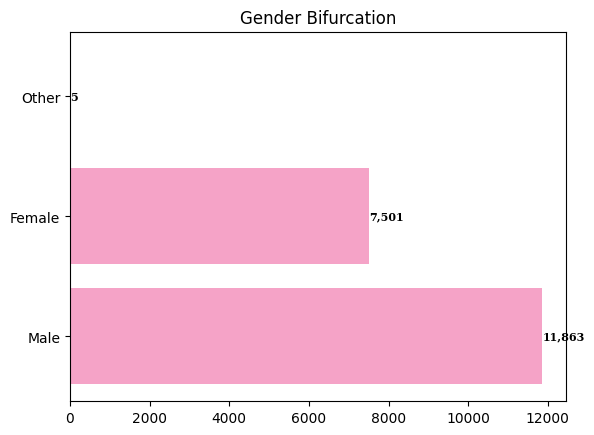

In [42]:
gen_Bif = pd.DataFrame(unique_data['Gender'].value_counts()).reset_index()
gen_Bif['% Contri.'] = round((gen_Bif['count']/unique_data['Gender'].value_counts().sum())*100,2)
gen_Bif.rename(columns={'count':'Total Applications'},inplace=True)
gen_Bif.loc[len(gen_Bif)] = ['Total', gen_Bif['Total Applications'].sum(), '']
fig, ax = plt.subplots(1)

if len(gen_Bif['Gender']) == 4:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:2], y = gen_Bif['Gender'][0:2], width = gen_Bif['Total Applications'][0:2], color = '#F5A3C7')
else:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:1], y = gen_Bif['Gender'][0:1], width = gen_Bif['Total Applications'][0:1], color = '#F5A3C7')

ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8.0, fontfamily='serif', fontweight='bold')
ax.set(title = 'Gender Bifurcation')

fig.show()
gen_Bif

# Centrewise Repeat Mobile numbers

In [43]:
repeat_mobile = pd.pivot_table(data=og_DF, index=['District', 'Mobile', 'Citizen GUID'], values='Case Id', aggfunc='count').sort_values(by='Case Id', ascending=False).reset_index()
repeat_mobile = pd.pivot_table(data=repeat_mobile, index=['District', 'Mobile'], values='Citizen GUID', aggfunc='count').sort_values(by='Citizen GUID', ascending=False).reset_index()
repeat_mobile = repeat_mobile[repeat_mobile['Citizen GUID']>5]
if repeat_mobile['Citizen GUID'].sum()>0:
    repeat_mobile.loc[len(repeat_mobile)] = ['Grand Total','',repeat_mobile['Citizen GUID'].sum()]
repeat_mobile.rename(columns={"Citizen GUID":"Total Citizens"}, inplace=True)
repeat_mobile.head()

,District,Mobile,Total Citizens
0,Mahesana,9081528381.0,6
1,Mahesana,9712281528.0,6
2,Haridwar,9319241234.0,6
3,Grand Total,,18


# Agewise Citizen Distribution

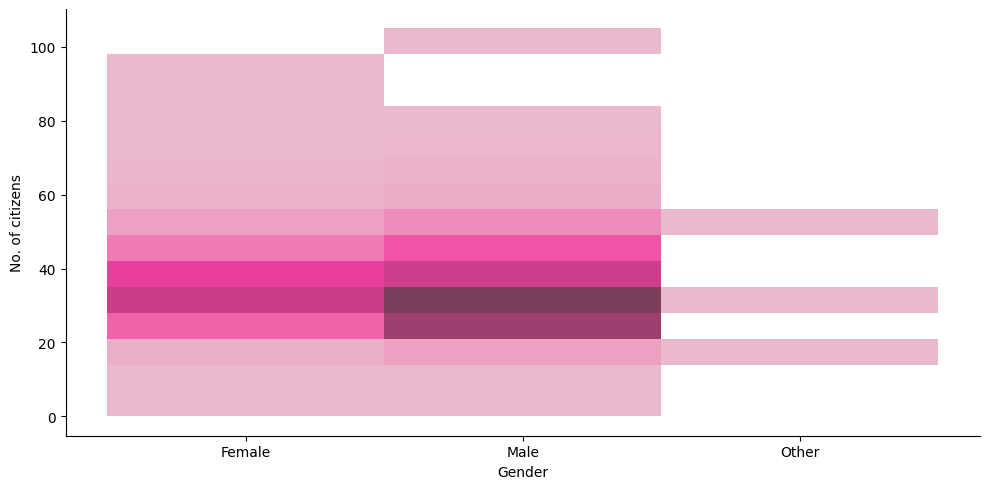

In [44]:
plot = sns.displot(data=unique_data, x='Gender', y='Age', kind='hist', bins=15, legend=True,  color='#F5A3C7', aspect=2)
plot.set(ylabel='No. of citizens')
plt.show()

# E-Gov and DFL Status Summary

In [45]:
eGov_DFL_Summary = pd.pivot_table(data=og_DF, index='District', columns=['Scheme Category','Status'], values='Case Id', aggfunc='count', fill_value=0)
eGov_DFL_Summary['Total'] = eGov_DFL_Summary.sum(axis = 1, numeric_only = 'True').values
eGov_DFL_Summary.sort_values(by='Total',ascending=False, inplace=True)
eGov_DFL_Summary.loc[len(eGov_DFL_Summary)] = eGov_DFL_Summary.sum(axis = 0, numeric_only = 'True').values
eGov_DFL_Summary.rename(index={eGov_DFL_Summary.index[-1]:'Grand Total'}, inplace=True)
eGov_DFL_Summary

Scheme Category                                      E-Gov                  \
Status                                    Benefit Received  Open Submitted   
District                                                                     
Haridwar                                              1288    71      1685   
South                                                  130   748      1677   
Udham Singh Nagar                                      639   273       775   
North West                                             770    61       686   
Jaipur                                                 661    28       461   
Kanpur Nagar                                           388     2       666   
Nuh                                                    480     5       545   
Dehradun                                               130    10       828   
Saharanpur                                             259    58       558   
Varanasi                                               439     6       385   
Jhansi                                                 210     2       237   
Nainital                                               165     5       229   
Lucknow                                                124     6       245   
Nashik                                                 195    68        85   
South West                                              54    14       251   
South East                                             116    26       154   
Surat                                                  212    31        35   
Barabanki                                               77     1       116   
Churu                                                   97     0        83   
Ahmadabad                                               42     6       118   
Mahesana                                                68    40        48   
East                                                    32     2       120   
Central                                                 55     9        53   
North East                                              44     2        66   
Banas Kantha                                            26     5        73   
Vadodara                                                74    28         2   
Rajsamand                                               28     1        66   
Jalgaon                                                 62    14        17   
Ahmednagar                                              76    11         0   
Pune                                                    33     6        43   
Palghar                                                  0     7        67   
Faridabad                                               70     0         0   
Bhavnagar                                                0     0        64   
Udaipur                                                  9     0        53   
Gautam Buddha Nagar                                     50     4         0   
North                                                    6     1        38   
Siddharth Nagar                                         43     1         0   
New Delhi                                                5     0        35   
Satara                                                  32     1         4   
Dohad                                                   35     0         0   
Sindhudurg                                              32     0         0   
Almora                                                   0     0        18   
West                                                     3     2         3   
Nashik Nashik Nashik Nashik Nashik Nashik                5     2         0   
Aligarh                                                  1     0         0   
Lalitpur                                                 1     0         0   
Samastipur                                               1     0         0   
Etah                                                     0     1         0   
Rewari                

# Exporting data to Excel Sheets

In [46]:
# Exporting data of unique records to Excel file.
with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx') as writer:
    unique_data.to_excel(writer, sheet_name='Schemes Data', index=False) # Exporting unique data
    projectwise_O_S_BR.to_excel(writer, sheet_name='projectwise_O_S_BR', index=False)
    districtWise.to_excel(writer, sheet_name='Districtwise achv', index=False)
    if repeat_mobile.shape[0]>0:
        repeat_mobile.to_excel(writer,sheet_name='Repeat_mobile_nos', index=False)
    Orgwise_Scheme_Diversity.to_excel(writer, sheet_name='Orgwise_Scheme_Diversity', index=False)
    cit_sch_ratio.to_excel(writer, sheet_name='Citizen_Scheme_Ratio', index=False)
    sch_doc_ratio.to_excel(writer, sheet_name='Scheme_Doc_Ratio', index=False)
    top_bottom_hd.to_excel(writer, sheet_name='Top_Bottom_HD', index=False)
    Scheme_Categorisation.to_excel(writer, sheet_name='Scheme_Categorisation', index=False)
    Sch_O_S_BR.to_excel(writer, sheet_name='Schwise_O_S_BR', index=False)
    gen_Bif.to_excel(writer, sheet_name='Gender_Bifurcation', index=False)
    if dfl.shape[0]>0:
        eGov_DFL_Summary.to_excel(writer, sheet_name='eGov_DFL_Status_Summary')
        dfl.to_excel(writer, sheet_name='DFL data', index=False)
        dfl_uniques.to_excel(writer, sheet_name='DFL unique data', index=False)
    rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
    duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False) # Exporting duplicate data
    parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False) # Exporting parent scheme duplicate data
    #plot.savefig(writer, sheet_name='Age_Dist')

exe_end = dt.now() # Recording execution end time
print('{0} project data exported to Excel!\nTotal {1} unique records exported.\nTotal {2} duplicate records exported.\nTotal {3} rejected records exported'.format(fn.split('_')[2]+' '+fn.split('_')[3],
                                                                                                                                                                   unique_data.shape[0],
                                                                                                                                                                   duplicateData.shape[0],
                                                                                                                                                                   rejectedDF.shape[0]))

Hindustan Unilever Limited All project data exported to Excel!
Total 19369 unique records exported.
Total 89 duplicate records exported.
Total 2019 rejected records exported


# HUL Projection Dashboard Update

In [49]:
if PID == 'PID/HINDU13/2023/MSME-DI/0376':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update HUL projection? (Y/N)")
    if consent in ('y', 'Y'):
        sch_map = {'SH000DPW' : 'Credit', 'SH0003PE':'Credit','SH0003PK':'Credit','SH000888':'Credit','SH0008BK':'Credit','SH0008PZ':'Credit','SH000971':'Credit','SH0009RA':'Credit','SH000AP8':'Credit','SH000BG8':'Credit','SH000CM7':'Credit','SH000D1A':'Credit','SH000DG0':'Credit','DC0008KR':'Formalization','DC0008R0':'Formalization','DC0008WZ':'Formalization','DC00096J':'Formalization','DC0009SJ':'Formalization','DC000A49':'Formalization','DC000DG3':'Formalization','SH0009RR':'YC'}
        unique_data['HUL Category'] = unique_data['Scheme/Doc GUID'].apply(lambda x: sch_map[x])
        unique_data.State = unique_data.State.apply(lambda x: "Delhi" if x=="Haryana" else x)
        col_ord = ['Case Id', 'HUL Category', 'Opsco name', 'Createdon', 'Scheme/Doc', 'Scheme/Doc GUID', 'Status', 'Docket Submitted Date', 'Benefit received Date', 'HD Suspected Cases', 'State', 'District',
     'Citizen GUID', 'Citizen Name', 'Gender', 'Mobile', 'Age', 'Citizen Block', 'Citizen Village', 'Family GUID', 'Family Name', 'HD ID', 'HD Name', 'AMS ID', 'Parent Scheme',
     'Scheme type', 'Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category','duplicate','parent_duplicate','No of cases']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\HUL\HUL - YC and formalisation Plan_Nov 2024.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
        print("HUL projection updated!")
    else:
        print("You chose NO to update HUL Projection!")

Do you want to update HUL projection? (Y/N) Y


HUL projection updated!


# Daily Tracker Update

In [ ]:
if PID in ['PID/TATAP2/2024/DI/0457','PID/TATAP7/2023/DI/0280','PID/TATAS1/2024/DI/0447','PID/THERM2/2024/DI/0437']:
    if PID == 'PID/TATAP2/2024/DI/0457':
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Power Renewables (TPREL, TPSSL, WREL) Multi state FY 25\Tata Power Renew - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
    elif PID == 'PID/TATAP7/2023/DI/0280':
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Power (Maithon)\Tata Power Maithon - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
    elif PID == 'PID/TATAS1/2024/DI/0447':
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Steel\Tata Steel - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
    elif PID == 'PID/THERM2/2024/DI/0437':
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Thermax Global Scale Up\Thermax Global - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)

# Logging the execution process

In [50]:
log = [init_file_size,exe_start.strftime("%d/%m/%Y %H:%M:%S"),exe_end.strftime("%d/%m/%Y %H:%M:%S"),int(round((exe_end-exe_start).total_seconds(),0)),fn.split('_')[2]+' '+fn.split('_')[3],unique_data.shape[0],duplicateData.shape[0],rejectedDF.shape[0]]

lwb = load_workbook(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Loading the workbook
lws = lwb.worksheets[0] # Setting the worksheet
lws.append(log) # Appending the log row
lwb.save(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Saving the logged data
print('Logging Done!\n',log)

Logging Done!
 [5.92, '27/11/2024 10:15:15', '27/11/2024 10:22:26', 431, 'Hindustan Unilever Limited All', 19369, 89, 2019]


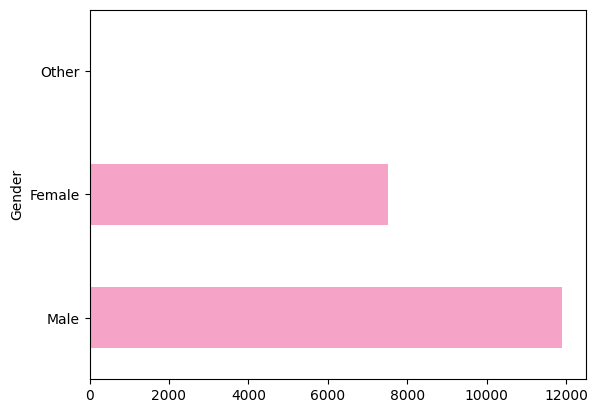

In [51]:
og_DF.Gender.value_counts().plot.barh(color='#F5A3C7')
plt.show()

In [52]:
og_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         19415 non-null  object        
 1   Createdon                       19415 non-null  datetime64[ns]
 2   Scheme/Doc                      19415 non-null  object        
 3   Scheme/Doc GUID                 19415 non-null  object        
 4   Status                          19415 non-null  object        
 5   Docket Submitted Date           17857 non-null  datetime64[ns]
 6   Benefit received Date           7268 non-null   datetime64[ns]
 7   HD Suspected Cases              19415 non-null  object        
 8   State                           19415 non-null  object        
 9   District                        19415 non-null  object        
 10  Citizen GUID                    19415 non-null  object        
 11  Ci

# Exporting original transformed data to excel.

In [53]:
# Notifying user to give consent..
notification = Notify()
notification.title = "Consent Required"
notification.message = "Hello Akash! Waiting for your consent."
notification.audio = "E:/Music/Ringtone/Consent required1.wav"
notification.send()

# Asking consent from user for original data export.
consent = input("Do you want to export original data? (Y/N)\n")

if consent in ["Y","y"]:
    with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' og_data.xlsx') as writer:
        try:
            print("Exporting full data.")
            og_DF.to_excel(writer, sheet_name='Raw Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
        except ValueError:
            print("Full data export failed due to excel rows limit exceeded hence exporting data in part.")
            og_DF[og_DF['Scheme Category'] == 'E-Gov'].to_excel(writer, sheet_name='E-Gov', index=False)
            og_DF[og_DF['Scheme Category'] == 'DFL'].to_excel(writer, sheet_name='DFL', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
else:
    print("You dont want original data!")

Do you want to export original data? (Y/N)
 N


You dont want original data!


,Status,Total Application
2,Open,1558
1,Benefit Received,7268
0,Submitted,10589
3,Grand Total,19415


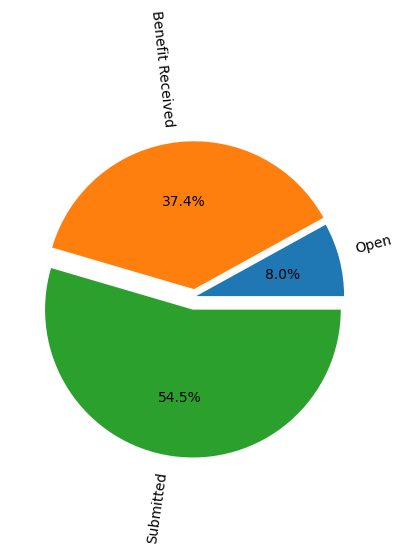

In [54]:
# Changing status values to O_S_BR
og_summary = pd.DataFrame(og_DF[og_DF['Scheme Category']=='E-Gov'].Status.value_counts())
og_summary.rename(columns={'count':'Total Application'}, inplace=True)
og_summary.reset_index(inplace=True)
og_summary.loc[len(og_summary.index)] = ['Grand Total', og_summary['Total Application'].sum()]
try:
    og_summary = og_summary.iloc[[2,1,0,3]]
    plt.pie(og_summary['Total Application'][0:3], labels=og_summary['Status'][0:3], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05,0.09])
except IndexError:
    og_summary = og_summary.iloc[[1,0,2]]
    plt.pie(og_summary['Total Application'][0:2], labels=og_summary['Status'][0:2], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05])
og_summary

# Notifying user using Notification

In [55]:
notification.title = "Process Execution Alert"
notification.message = "Hello Akash! Python script execution has completed."
notification.audio = "E:/Music/Ringtone/Process Execution Alert.wav"
notification.send(block=False)
print('Script execution completed!')

Script execution completed!


In [56]:
unique_data.isna().sum()

Case Id                               0
Createdon                             0
Scheme/Doc                            0
Scheme/Doc GUID                       0
Status                                0
Docket Submitted Date              1558
Benefit received Date             12112
HD Suspected Cases                    0
State                                 0
District                              0
Citizen GUID                          0
Citizen Name                          0
Gender                                0
Mobile                                0
Age                                   0
Citizen Block                      9793
Citizen Village                    9790
Family GUID                           0
Family Name                           0
HD ID                                 0
HD Name                               0
Opsco name                            0
AMS ID                               45
Parent Scheme                         0
Scheme type                          34


In [57]:
cat_col = []
num_col = []

for c in unique_data.select_dtypes(exclude='datetime'):
    if unique_data[c].dtype == 'object':
        if c not in ['Case Id','Scheme/Doc GUID','Citizen GUID','Family GUID']:
            cat_col.append(c)
    elif unique_data[c].dtype in ['int64','float64']:
        if c not in ['Mobile','AMS ID']:
            num_col.append(c)    

In [58]:
cat_col

['Scheme/Doc',
 'Status',
 'HD Suspected Cases',
 'State',
 'District',
 'Citizen Name',
 'Gender',
 'Citizen Block',
 'Citizen Village',
 'Family Name',
 'HD ID',
 'HD Name',
 'Opsco name',
 'Parent Scheme',
 'Scheme type',
 'Scheme Category',
 'duplicate',
 'parent_duplicate',
 'HUL Category']

In [59]:
num_col

['Age',
 'Benefit Value',
 'open_price',
 'Docket submitted price',
 'scheme_document_received price',
 'HD_Payment',
 'No of cases']

In [60]:
scaler = StandardScaler()
unique_data_scaled = scaler.fit_transform(unique_data[num_col])
unique_data_scaled_numcol = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_scaled_numcol.head()

,Age,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,No of cases
0,0.660253,1.288768,0.0,2.821123,-0.408605,0.799127,-0.765293
1,0.247546,1.288768,0.0,2.821123,-0.408605,0.799127,-0.765293
2,-0.061984,0.036020,0.0,1.716013,0.091515,0.799127,-0.765293
3,-0.990574,1.288768,0.0,2.821123,-0.408605,0.799127,-0.765293
4,0.660253,1.288768,0.0,2.821123,-0.408605,0.799127,-0.765293


<Axes: >

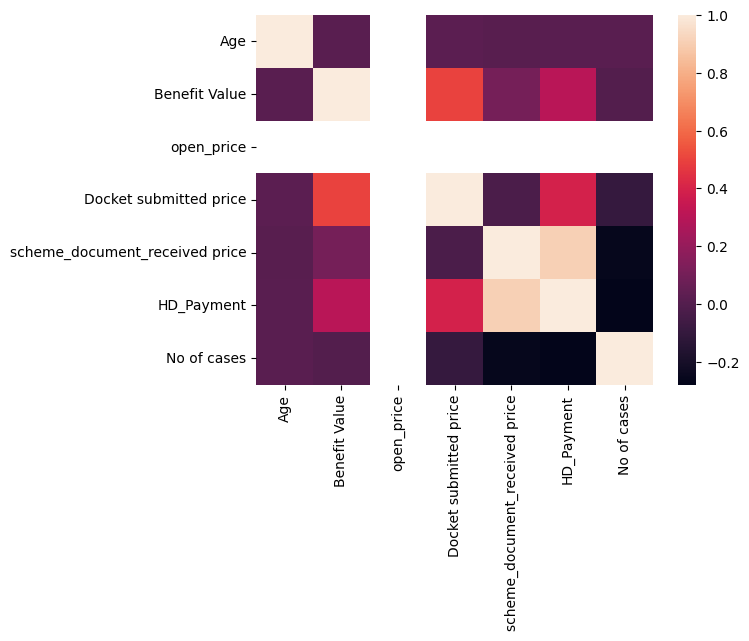

In [61]:
sns.heatmap(unique_data_scaled_numcol.corr())

In [62]:
unique_data_scaled

array([[ 0.6602528 ,  1.28876758,  0.        , ..., -0.40860498,
         0.79912734, -0.7652927 ],
       [ 0.24754619,  1.28876758,  0.        , ..., -0.40860498,
         0.79912734, -0.7652927 ],
       [-0.06198376,  0.03602028,  0.        , ...,  0.09151476,
         0.79912734, -0.7652927 ],
       ...,
       [ 0.76342946, -0.61290935,  0.        , ..., -1.20046124,
        -1.31096538, -0.7652927 ],
       [-0.99057364, -0.61290935,  0.        , ..., -1.20046124,
        -1.31096538, -0.7652927 ],
       [ 0.96978276, -0.61290935,  0.        , ..., -1.20046124,
        -1.31096538, -0.7652927 ]])

In [63]:
encoder = OneHotEncoder()
#unique_data_scaled = pd.DataFrame(unique_data_scaled, columns=num_col)
unique_data_encode = encoder.fit_transform(unique_data[cat_col])
unique_data_encode = pd.DataFrame(unique_data_encode, index=unique_data.index)
#unique_data_scaled_catcol = pd.DataFrame(unique_data_scaled, columns=cat_col)
#unique_data_scaled_catcol.head()

In [64]:
unique_data_encode.head()

,0
0,"(0, 11)\t1.0\n (0, 22)\t1.0\n (0, 24)\t1.0..."
1,"(0, 11)\t1.0\n (0, 22)\t1.0\n (0, 24)\t1.0..."
2,"(0, 18)\t1.0\n (0, 22)\t1.0\n (0, 24)\t1.0..."
3,"(0, 11)\t1.0\n (0, 22)\t1.0\n (0, 24)\t1.0..."
4,"(0, 11)\t1.0\n (0, 22)\t1.0\n (0, 24)\t1.0..."


In [65]:
try:
    a
except Exception as e:
    print(type(e))

<class 'NameError'>
